In [130]:
import itertools

import pandas as pd
import geopandas as gpd

# Mappings and files

In [3]:
bayareafips_full = {'06001': 'Alameda County', '06013': 'Contra Costa County', '06041': 'Marin County', '06055': 'Napa County',
                    '06075': 'San Francisco County', '06081': 'San Mateo County', '06085': 'Santa Clara County',
                    '06097': 'Sonoma County', '06095': 'Solano County'}

bayareareg = dict([(k,'ABAG/MTC') for k in bayareafips_full])


In [4]:
# for halo counties, rely on the regionalization in
# http://www.cdss.ca.gov/research/res/pdf/multireports/RegionsofCalifornia.pdf


halofips = {'06077': 'San Joaquin', '06099': 'Stanislaus', '06067': 'Sacramento', '06047': 'Merced',
            '06113': 'Yolo', '06115': 'Yuba', '06101': 'Sutter', '06017': 'El Dorado', '06061': 'Placer',
            '06087': 'Santa Cruz', '06069': 'San Benito', '06053': 'Monterey',
            '06033': 'Lake', '06045': 'Mendocino'}

halotype = {'06077': 'Halo Southern Farm', '06047': 'Halo Southern Farm', '06033': 'Halo North and Mountains', '06045': 'Mendocino',
            '06045': 'Halo North and Mountains',
            '06099': 'Halo Southern Farm', '06067': 'Halo Central Valley',
            '06113': 'Halo Central Valley', '06115': 'Halo Central Valley', '06101': 'Halo Central Valley',
            '06017': 'Halo Central Valley', '06061': 'Halo Central Valley',
            '06087': 'Halo Southern Coast', '06069': 'Halo Southern Farm', '06053': 'Halo Southern Coast'}

bayareareg_w_halo = bayareareg | halotype
bayareareg_w_halo

{'06001': 'ABAG/MTC',
 '06013': 'ABAG/MTC',
 '06041': 'ABAG/MTC',
 '06055': 'ABAG/MTC',
 '06075': 'ABAG/MTC',
 '06081': 'ABAG/MTC',
 '06085': 'ABAG/MTC',
 '06097': 'ABAG/MTC',
 '06095': 'ABAG/MTC',
 '06077': 'Halo Southern Farm',
 '06047': 'Halo Southern Farm',
 '06033': 'Halo North and Mountains',
 '06045': 'Halo North and Mountains',
 '06099': 'Halo Southern Farm',
 '06067': 'Halo Central Valley',
 '06113': 'Halo Central Valley',
 '06115': 'Halo Central Valley',
 '06101': 'Halo Central Valley',
 '06017': 'Halo Central Valley',
 '06061': 'Halo Central Valley',
 '06087': 'Halo Southern Coast',
 '06069': 'Halo Southern Farm',
 '06053': 'Halo Southern Coast'}

In [5]:
cog_regions = {'06001': 'ABAG/MTC',
               '06013': 'ABAG/MTC',
               '06041': 'ABAG/MTC',
               '06053': 'AMBAG',
               '06055': 'ABAG/MTC',
               '06069': 'AMBAG',
               '06075': 'ABAG/MTC',
               '06073': 'SANDAG',
               '06081': 'ABAG/MTC',
               '06085': 'ABAG/MTC',
               '06087': 'AMBAG',
               '06095': 'ABAG/MTC',
               '06097': 'ABAG/MTC',
               '06077': 'SJCOG',
               '06099': 'STANCOG',
               '06047': 'MCAG',
               '06025': 'SCAG',  # imperial
               '06037': 'SCAG',   # LA
               '06071': 'SCAG',  # san bernadino
               '06059': 'SCAG',  # orange
               '06065': 'SCAG',  # riverside
               '06111': 'SCAG',  # ventura
               '06067': 'SACOG',  # 'yolo'
               '06101': 'SACOG',  # 'sutter'
               '06113': 'SACOG',  # 'yolo'
               '06115': 'SACOG'
               }  # 'yuba' }
# cog_regions.update(halotype)
cog_regions

{'06001': 'ABAG/MTC',
 '06013': 'ABAG/MTC',
 '06041': 'ABAG/MTC',
 '06053': 'AMBAG',
 '06055': 'ABAG/MTC',
 '06069': 'AMBAG',
 '06075': 'ABAG/MTC',
 '06073': 'SANDAG',
 '06081': 'ABAG/MTC',
 '06085': 'ABAG/MTC',
 '06087': 'AMBAG',
 '06095': 'ABAG/MTC',
 '06097': 'ABAG/MTC',
 '06077': 'SJCOG',
 '06099': 'STANCOG',
 '06047': 'MCAG',
 '06025': 'SCAG',
 '06037': 'SCAG',
 '06071': 'SCAG',
 '06059': 'SCAG',
 '06065': 'SCAG',
 '06111': 'SCAG',
 '06067': 'SACOG',
 '06101': 'SACOG',
 '06113': 'SACOG',
 '06115': 'SACOG'}

In [131]:
state_fips=pd.read_csv('../data/statefips.txt',dtype=str)
ca_geos = gpd.read_file('../data/ca_counties.shp')
#set(ca_geos.GEOID)-set(cog_regions.keys())
ca_geos.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,macroreg,cogreg,geometry
0,06,037,00277283,0500000US06037,06037,Los Angeles,Los Angeles County,CA,California,06,10513491099,1787501506,Southern California,SCAG,"MULTIPOLYGON (((129777.289 -503034.640, 130301..."
1,06,023,01681908,0500000US06023,06023,Humboldt,Humboldt County,CA,California,06,9241565229,1253726036,North Coast,None,"POLYGON ((-373865.773 278378.334, -372754.945 ..."
2,06,097,01657246,0500000US06097,06097,Sonoma,Sonoma County,CA,California,06,4080862341,498084088,Bay Area,ABAG,"POLYGON ((-306588.058 89313.140, -306210.097 8..."
3,06,079,00277304,0500000US06079,06079,San Luis Obispo,San Luis Obispo County,CA,California,06,8549172832,815618272,Central Coast,None,"POLYGON ((-121549.192 -246008.590, -112398.145..."
4,06,089,01682610,0500000US06089,06089,Shasta,Shasta County,CA,California,06,9778551576,186157964,Shasta Cascades,None,"POLYGON ((-260782.247 258918.819, -260645.840 ..."


## Prep county classification

In [133]:
county_class = pd.read_excel(
    '../data/Rosetta_County.xlsx', index_col=[0, 1, 2, 3], engine='openpyxl')
county_class.index = county_class.index.set_names(
    ['CBSA_CODE', 'CBSA_Title', 'STCOUNTY', 'county_name'])
county_class = county_class.reset_index()
county_class = county_class.rename(columns={'Brookings': 'Bill Frey / Brookings Inst.',
                                            'Kolko': 'Jed Kolko / Indeed',
                                            'Yonder': 'Bill Bishop / Daily Yonder'})

for klass in ['Bill Frey / Brookings Inst.', 'Jed Kolko / Indeed', 'Bill Bishop / Daily Yonder']:
    county_class[klass] = county_class[klass].str.replace(' Counties', '').str.replace(
        'Rural Adjacent to Large', 'Rrl adj. to lg.')  # .apply(lambda x: '\n'.join(x))
county_class.STCOUNTY = county_class.STCOUNTY.apply(
    lambda x: '{:0>5}'.format(x))
county_class.CBSA_CODE = county_class.CBSA_CODE.apply(
    lambda x: '{:0>5}'.format(x))

klass_order = {'Bill Frey / Brookings Inst.': ['1-Urban Core', u'2-Mature Suburb', u'3-Emerging Suburb', u'4-Exurb',
                                               u'NonMetro', 'Rest of Counties'],
               'Jed Kolko / Indeed': [u'1-Urban', u'2-SuburbanHigh', u'3-SuburbanLow', 'Rest of Counties'],
               'Bill Bishop / Daily Yonder': [u'1-Central counties', u'2-Suburban', u'3-Exurban',
                                              u'4-Rrl adj. to lg. MSA', 'Rest of Counties']}

county_class['state'] = county_class.STCOUNTY.str.slice(
    0, 2).map(state_fips.set_index('FIPS').Name)
county_class['state_county'] = county_class.state+', '+county_class.county_name
county_class.head()

/Users/aolsen/opt/anaconda3/envs/geo_env_2/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,CBSA_CODE,CBSA_Title,STCOUNTY,county_name,Bill Frey / Brookings Inst.,Jed Kolko / Indeed,Bill Bishop / Daily Yonder,Population,Density,state,state_county
0,12060,"Atlanta-Sandy Springs-Marietta, GA",13013,Barrow County,4-Exurb,3-SuburbanLow,2-Suburban,80834,188.10490,Georgia,"Georgia, Barrow County"
1,12060,"Atlanta-Sandy Springs-Marietta, GA",13015,Bartow County,3-Emerging Suburb,3-SuburbanLow,2-Suburban,106378,169.13420,Georgia,"Georgia, Bartow County"
2,12060,"Atlanta-Sandy Springs-Marietta, GA",13035,Butts County,4-Exurb,3-SuburbanLow,3-Exurban,24192,50.40048,Georgia,"Georgia, Butts County"
3,12060,"Atlanta-Sandy Springs-Marietta, GA",13045,Carroll County,4-Exurb,3-SuburbanLow,2-Suburban,117997,143.57570,Georgia,"Georgia, Carroll County"
4,12060,"Atlanta-Sandy Springs-Marietta, GA",13057,Cherokee County,2-Mature Suburb,3-SuburbanLow,2-Suburban,253914,417.50190,Georgia,"Georgia, Cherokee County"


# Load and combine data

In [134]:
# load 2020-2022 file - this counts change since April 1, 2020
popest2010s = pd.read_csv(
    '../data/co-est2020-alldata.csv', encoding='windows-1252')

# load 2010-2020 file - this counts change since April 1, 2010
popest2020s = pd.read_csv(
    '../data/co-est2022-alldata.csv')

# Drop all 2020-related columns - so we don't get the odd April 1, 2020 - June 30 2020 column
popest2020s = popest2020s[popest2020s.columns.difference(popest2020s.filter(regex='2020').columns)]

index_cols = ['SUMLEV', 'REGION', 'DIVISION',
              'STATE', 'COUNTY', 'STNAME', 'CTYNAME']

# combine the two
popest = pd.concat([popest2010s.set_index(index_cols),
                   popest2020s.set_index(index_cols)], axis=1).reset_index()

# add a state-county FIPS column
popest['STCOUNTY'] = popest.STATE.apply(lambda x: f'{x:02d}')+popest.COUNTY.apply(lambda x: f'{x:03d}')
popest['county_name'] = popest.CTYNAME.str.replace(' County','')

# keep only county summary levels - drops state summaries
popest = popest[popest.SUMLEV==50]

# add CA relevant regionalizations
popest['region'] = popest.STCOUNTY.map(cog_regions)
popest['region_2'] = popest.STCOUNTY.map(bayareareg_w_halo)

popest['macroreg']=popest.STCOUNTY.map(ca_geos.set_index('GEOID').macroreg)

## Add county classification

In [145]:
popest_class = popest.merge(county_class,on=['STCOUNTY'],how='left')
popest_class.update(popest_class[[ 'Bill Frey / Brookings Inst.',
       'Jed Kolko / Indeed', 'Bill Bishop / Daily Yonder']].fillna('NonMetro'))

/var/folders/x8/3_n775lx7zq1nv3mddc7vmlh0000gp/T/ipykernel_49401/1791299117.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  popest_class.query('STATE==6').groupby(['Bill Frey / Brookings Inst.']).sum().filter(regex='POPEST').T.plot(kind='barh',stacked=True)


<AxesSubplot: >

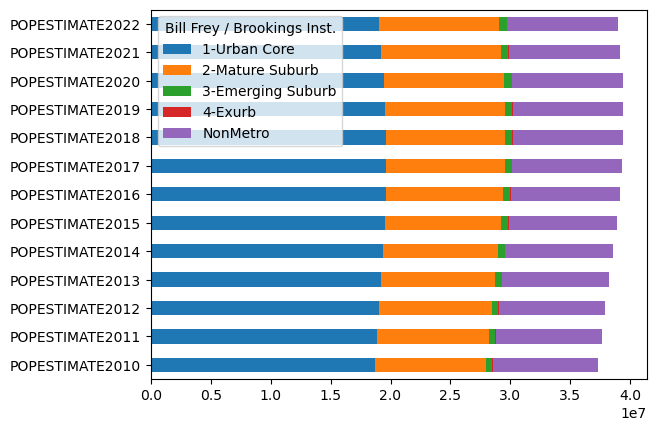

In [151]:
# high level summary - urban core grows a bit, then recedes again
popest_class.query('STATE==6').groupby(['Bill Frey / Brookings Inst.']).sum().filter(regex='POPEST').T.plot(kind='barh',stacked=True)

# Get long form data

In [138]:
# these are the demographic variables we need, or the stubs of them
component_concepts = ['BIRTHS', 'DEATHS',
                      'INTERNATIONALMIG', 'DOMESTICMIG', 'RESIDUAL']

# these are the years we want to keep
years = map(lambda x: str(x), range(2011, 2023))
years_2 = list(map(lambda x: str(x), range(2012, 2023,2)))

# blend the two togehter
components = list(map(lambda x: ''.join(x), list(
    itertools.product(*[component_concepts, years]))))
components

['BIRTHS2011',
 'BIRTHS2012',
 'BIRTHS2013',
 'BIRTHS2014',
 'BIRTHS2015',
 'BIRTHS2016',
 'BIRTHS2017',
 'BIRTHS2018',
 'BIRTHS2019',
 'BIRTHS2020',
 'BIRTHS2021',
 'BIRTHS2022',
 'DEATHS2011',
 'DEATHS2012',
 'DEATHS2013',
 'DEATHS2014',
 'DEATHS2015',
 'DEATHS2016',
 'DEATHS2017',
 'DEATHS2018',
 'DEATHS2019',
 'DEATHS2020',
 'DEATHS2021',
 'DEATHS2022',
 'INTERNATIONALMIG2011',
 'INTERNATIONALMIG2012',
 'INTERNATIONALMIG2013',
 'INTERNATIONALMIG2014',
 'INTERNATIONALMIG2015',
 'INTERNATIONALMIG2016',
 'INTERNATIONALMIG2017',
 'INTERNATIONALMIG2018',
 'INTERNATIONALMIG2019',
 'INTERNATIONALMIG2020',
 'INTERNATIONALMIG2021',
 'INTERNATIONALMIG2022',
 'DOMESTICMIG2011',
 'DOMESTICMIG2012',
 'DOMESTICMIG2013',
 'DOMESTICMIG2014',
 'DOMESTICMIG2015',
 'DOMESTICMIG2016',
 'DOMESTICMIG2017',
 'DOMESTICMIG2018',
 'DOMESTICMIG2019',
 'DOMESTICMIG2020',
 'DOMESTICMIG2021',
 'DOMESTICMIG2022',
 'RESIDUAL2011',
 'RESIDUAL2012',
 'RESIDUAL2013',
 'RESIDUAL2014',
 'RESIDUAL2015',
 'RESIDUAL2016'

In [139]:
# needed for disambiguation
index_cols = ['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'region','region_2',
              'macroreg', 'county_name', 'STCOUNTY']


In [140]:
# Long form data
stack_var_name = 'level_%s'%len(index_cols)

popest_long = popest.set_index(index_cols).stack().reset_index(name='value')
popest_long['year'] = popest_long[stack_var_name].str.extract('(\d{4})',expand=False)
popest_long['variable'] = popest_long[stack_var_name].str.replace(
        '(\d{4})', '')
popest_long = popest_long.drop([stack_var_name],axis=1)
popest_long = popest_long.dropna(subset=['macroreg'])

# switch sign of deaths - they should be counted as negatives
popest_long.loc[popest_long.variable=='DEATHS','value'] *=-1
popest_long.head()

/var/folders/x8/3_n775lx7zq1nv3mddc7vmlh0000gp/T/ipykernel_49401/4182464666.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  popest_long['variable'] = popest_long[stack_var_name].str.replace(


,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,region,region_2,macroreg,county_name,STCOUNTY,value,year,variable
38335,50,4,9,6,1,California,Alameda County,ABAG/MTC,ABAG/MTC,Bay Area,Alameda,06001,1510271,2010,CENSUSPOP
38336,50,4,9,6,1,California,Alameda County,ABAG/MTC,ABAG/MTC,Bay Area,Alameda,06001,1510283.0,2010,ESTIMATESBASE
38337,50,4,9,6,1,California,Alameda County,ABAG/MTC,ABAG/MTC,Bay Area,Alameda,06001,1512997.0,2010,POPESTIMATE
38338,50,4,9,6,1,California,Alameda County,ABAG/MTC,ABAG/MTC,Bay Area,Alameda,06001,1530893.0,2011,POPESTIMATE
38339,50,4,9,6,1,California,Alameda County,ABAG/MTC,ABAG/MTC,Bay Area,Alameda,06001,1553729.0,2012,POPESTIMATE


In [141]:
# Bay Area county level summary
bayareapop_components_long = popest_long.query('variable.isin(@component_concepts) & STCOUNTY.isin(@bayareafips_full)').groupby(['CTYNAME', 'variable', 'year']).value.sum()
bayareapop_components_long.unstack('year')[years_2]

year                                      2012     2014     2016     2018  \
CTYNAME              variable                                               
Alameda County       BIRTHS            18978.0  19494.0  19582.0  18337.0   
                     DEATHS            -9204.0  -9252.0  -9566.0  -9909.0   
                     DOMESTICMIG        4028.0   6290.0  -6168.0  -9958.0   
                     INTERNATIONALMIG   9063.0  11475.0  12664.0   8351.0   
                     RESIDUAL            -29.0    123.0    -73.0    -49.0   
Contra Costa County  BIRTHS            11940.0  12243.0  12590.0  12112.0   
                     DEATHS            -6988.0  -7227.0  -7800.0  -8047.0   
                     DOMESTICMIG        4560.0   6444.0   3517.0  -1963.0   
                     INTERNATIONALMIG   2705.0   4027.0   4854.0   3138.0   
                     RESIDUAL           -139.0    -75.0    -50.0    -23.0   
Marin County         BIRTHS             2326.0   2431.0   2294.0   2192.0   
                     DEATHS            -1877.0  -1876.0  -1901.0  -1997.0   
                     DOMESTICMIG        -361.0    847.0  -1379.0   -586.0   
                     INTERNATIONALMIG    641.0    600.0    741.0    519.0   
                     RESIDUAL            -22.0    -40.0     -7.0    -12.0   
Napa County          BIRTHS             1528.0   1481.0   1459.0   1269.0   
                     DEATHS            -1129.0  -1166.0  -1224.0  -1285.0   
                     DOMESTICMIG         273.0    370.0   -383.0  -1206.0   
                     INTERNATIONALMIG    190.0    148.0    166.0     23.0   
                     RESIDUAL            -26.0    -24.0     -6.0      1.0   
San Francisco County BIRTHS             8782.0   8950.0   8995.0   8673.0   
                     DEATHS            -5543.0  -5472.0  -5694.0  -5960.0   
                     DOMESTICMIG        3631.0    753.0  -1361.0  -4612.0   
                     INTERNATIONALMIG   6154.0   6895.0   6164.0   4162.0   
                     RESIDUAL            245.0     97.0      2.0    -58.0   
San Mateo County     BIRTHS             9011.0   8948.0   9005.0   8413.0   
                     DEATHS            -4660.0  -4516.0  -4657.0  -4819.0   
                     DOMESTICMIG        2833.0   -673.0  -6878.0  -7117.0   
                     INTERNATIONALMIG   3541.0   4849.0   4999.0   3292.0   
                     RESIDUAL             30.0    -86.0    -20.0    -17.0   
Santa Clara County   BIRTHS            23420.0  23414.0  23285.0  21795.0   
                     DEATHS            -9307.0  -9432.0 -10108.0 -10218.0   
                     DOMESTICMIG       -1556.0  -7622.0 -21023.0 -25110.0   
                     INTERNATIONALMIG  13528.0  19198.0  20226.0  13244.0   
                     RESIDUAL           -371.0   -322.0     28.0     23.0   
Solano County        BIRTHS             5066.0   5255.0   5175.0   5103.0   
                     DEATHS            -2920.0  -3035.0  -3224.0  -3534.0   
                     DOMESTICMIG         126.0   2253.0   2690.0    550.0   
                     INTERNATIONALMIG   1146.0    885.0    818.0    268.0   
                     RESIDUAL            -98.0    -21.0     -3.0    -10.0   
Sonoma County        BIRTHS             5043.0   4996.0   5143.0   4512.0   
                     DEATHS            -3853.0  -3995.0  -4116.0  -4187.0   
                     DOMESTICMIG        1314.0   2846.0    146.0  -5398.0   
                     INTERNATIONALMIG    123.0    605.0    705.0     83.0   
                     RESIDUAL            -74.0     -5.0    -31.0      8.0   

year                                      2020     2022  
CTYNAME              variable                            
Alameda County       BIRTHS            18186.0  17295.0  
                     DEATHS           -11948.0 -11040.0  
                     DOMESTICMIG      -16777.0 -33191.0  
                     INTERNATIONALMIG   4436.0  11634.0  
                     RESIDUAL   

In [142]:
# CA Macroregions
camacropop_components_long = popest_long.query('variable.isin(@component_concepts)').groupby(['macroreg', 'variable', 'year']).value.sum()
camacropop_components_long.to_csv('../output/camacropop_components_long_2020_2022.csv')
camacropop_components_long.unstack('year')[years_2]


year                                      2012      2014      2016      2018  \
macroreg            variable                                                   
Bay Area            BIRTHS             86094.0   87212.0   87528.0   82406.0   
                    DEATHS            -45481.0  -45971.0  -48290.0  -49956.0   
                    DOMESTICMIG        14848.0   11508.0  -30839.0  -55400.0   
                    INTERNATIONALMIG   37091.0   48682.0   51337.0   33080.0   
                    RESIDUAL            -484.0    -353.0    -160.0    -137.0   
Central Coast       BIRTHS             18959.0   18475.0   18280.0   16947.0   
                    DEATHS             -9450.0   -9636.0  -10154.0  -10495.0   
                    DOMESTICMIG         2738.0     466.0   -2016.0   -6048.0   
                    INTERNATIONALMIG    1172.0    2201.0    2977.0     137.0   
                    RESIDUAL            -153.0    -110.0     -47.0       4.0   
Desert              BIRTHS              3243.0    3404.0    3327.0    2929.0   
                    DEATHS             -1158.0   -1230.0   -1318.0   -1314.0   
                    DOMESTICMIG        -1309.0   -1063.0   -1735.0   -1708.0   
                    INTERNATIONALMIG     -74.0     308.0     704.0     -30.0   
                    RESIDUAL              13.0      -2.0       2.0      10.0   
Gold Country        BIRTHS              7937.0    8068.0    7960.0    7920.0   
                    DEATHS             -6583.0   -6815.0   -7382.0   -7628.0   
                    DOMESTICMIG          662.0    4693.0    8017.0   10725.0   
                    INTERNATIONALMIG     536.0     732.0     808.0     263.0   
                    RESIDUAL             -26.0     -69.0     -18.0     -25.0   
North Coast         BIRTHS              3613.0    3620.0    3567.0    3316.0   
                    DEATHS             -3238.0   -3293.0   -3390.0   -3317.0   
                    DOMESTICMIG        -1626.0    -410.0     998.0     321.0   
                    INTERNATIONALMIG      20.0       4.0     184.0      16.0   
                    RESIDUAL             -15.0     -29.0      -8.0     -13.0   
Sacramento Valley   BIRTHS             23844.0   24136.0   24175.0   23418.0   
                    DEATHS            -12766.0  -13062.0  -13750.0  -14654.0   
                    DOMESTICMIG        -2034.0    2816.0    4861.0     231.0   
                    INTERNATIONALMIG    4312.0    6146.0    7071.0    4243.0   
                    RESIDUAL            -271.0    -191.0     -46.0     -19.0   
San Joaquin Valley  BIRTHS             65029.0   63718.0   62894.0   59788.0   
                    DEATHS            -26533.0  -27306.0  -28743.0  -30494.0   
                    DOMESTICMIG       -17579.0   -3939.0   -9233.0    3896.0   
                    INTERNATIONALMIG    1719.0    4076.0    6799.0     471.0   
                    RESIDUAL              16.0    -394.0     -65.0     -46.0   
Shasta Cascades     BIRTHS              6327.0    6583.0    6449.0    6236.0   
                    DEATHS             -6134.0   -6214.0   -6632.0   -6593.0   
                    DOMESTICMIG        -1232.0      81.0    1278.0    1772.0   
                    INTERNATIONALMIG     307.0     546.0     498.0     254.0   
                    RESIDUAL             -33.0     -48.0     -22.0     -10.0   
Sierra Nevada       BIRTHS               754.0     781.0     743.0     746.0   
                    DEATHS              -835.0    -924.0    -942.0    -929.0   
                    DOMESTICMIG         -981.0    -173.0     193.0     333.0   
                    INTERNATIONALMIG      68.0     108.0     139.0      83.0   
                    RESIDUAL              22.0     -14.0      -3.0      -4.0   
Southern California BIRTHS            281628.0  282934.0  274223.0  258306.0   
                    DEATHS           -127363.0 -129593.0 -139514.0 -144800.0   
                    DOMESTICMIG       -34787.0  -60386.0  -93744.0 -114314.0   


In [143]:
# CA misc COG regions
cacogpop_components_long = popest_long.query('variable.isin(@component_concepts)').groupby(['region', 'variable', 'year']).value.sum()
cacogpop_components_long.to_csv('../output/cacogpop_components_long_2020_2022.csv')
cacogpop_components_long.unstack('year')[years_2]

year                           2012      2014      2016      2018      2020  \
region   variable                                                             
ABAG/MTC BIRTHS             86094.0   87212.0   87528.0   82406.0   80467.0   
         DEATHS            -45481.0  -45971.0  -48290.0  -49956.0  -58042.0   
         DOMESTICMIG        14848.0   11508.0  -30839.0  -55400.0  -86461.0   
         INTERNATIONALMIG   37091.0   48682.0   51337.0   33080.0   16980.0   
         RESIDUAL            -484.0    -353.0    -160.0    -137.0     -75.0   
AMBAG    BIRTHS             10689.0   10080.0    9996.0    9107.0    9009.0   
         DEATHS             -4327.0   -4419.0   -4671.0   -4743.0   -5371.0   
         DOMESTICMIG         -574.0   -2002.0   -1439.0   -4504.0   -7452.0   
         INTERNATIONALMIG     266.0     792.0    1377.0    -238.0    -334.0   
         RESIDUAL            -137.0     -31.0     -30.0       7.0     -19.0   
MCAG     BIRTHS              4302.0    4211.0    4089.0    3867.0    3855.0   
         DEATHS             -1563.0   -1610.0   -1793.0   -1782.0   -1922.0   
         DOMESTICMIG        -1126.0    -281.0   -1316.0    1014.0     392.0   
         INTERNATIONALMIG     -79.0      75.0     253.0    -201.0    -205.0   
         RESIDUAL              -7.0     -42.0       4.0      -2.0      18.0   
SACOG    BIRTHS             24388.0   24619.0   24659.0   23916.0   23534.0   
         DEATHS            -12918.0  -13234.0  -13960.0  -14901.0  -16332.0   
         DOMESTICMIG        -1998.0    2886.0    5017.0     921.0   -1095.0   
         INTERNATIONALMIG    4523.0    6296.0    7178.0    4292.0    2066.0   
         RESIDUAL            -284.0    -212.0     -43.0     -20.0     108.0   
SANDAG   BIRTHS             43831.0   44247.0   43311.0   40513.0   39080.0   
         DEATHS            -19877.0  -19878.0  -21046.0  -21906.0  -25040.0   
         DOMESTICMIG          441.0     547.0  -10940.0   -9636.0  -14678.0   
         INTERNATIONALMIG   14054.0   14072.0   13468.0    4645.0    2458.0   
         RESIDUAL            -537.0    -469.0    -156.0    -152.0     148.0   
SCAG     BIRTHS            240812.0  241853.0  234040.0  220536.0  211504.0   
         DEATHS           -108441.0 -110738.0 -119592.0 -124011.0 -140836.0   
         DOMESTICMIG       -36469.0  -61892.0  -84329.0 -106465.0 -119271.0   
         INTERNATIONALMIG   36276.0   51400.0   55478.0   25169.0    8177.0   
         RESIDUAL           -2423.0   -1837.0    -160.0      72.0     411.0   
SJCOG    BIRTHS             10082.0    9922.0   10156.0    9914.0    9957.0   
         DEATHS             -4982.0   -5114.0   -5371.0   -5649.0   -6339.0   
         DOMESTICMIG         -390.0    3609.0    3978.0    4258.0    2473.0   
         INTERNATIONALMIG     563.0    1121.0    2006.0     793.0     269.0   
         RESIDUAL             -94.0     -73.0     -26.0     -12.0      36.0   
STANCOG  BIRTHS              7696.0    7496.0    7766.0    7355.0    7335.0   
         DEATHS             -3811.0   -3929.0   -4272.0   -4368.0   -4676.0   
         DOMESTICMIG        -1287.0     502.0    1718.0     234.0   -2313.0   
         INTERNATIONALMIG     256.0     527.0     854.0     156.0     -58.0   
         RESIDUAL             -33.0     -95.0     -34.0     -16.0      32.0   

year                           2022  
region   variable                    
ABAG/MTC BIRTHS             77244.0  
         DEATHS            -53936.0  
         DOMESTICMIG      -130144.0  
         INTERNATIONALMIG   47534.0  
         RESIDUAL            1467.0  
AMBAG    BIRTHS              8616.0  
         DEATHS             -5375.0  
         DOMESTICMIG        -4406.0  
         INTERNATIONALMIG    1078.0  
         RESIDUAL             475.0  
MCAG     BIRTHS              3853.0  
         DEATHS             -2236.0  
         DOMESTICMIG         3476.0  
         INTERNATIONALMIG     344.0  
         RESIDUAL             119.0  
SACOG    BIRTHS             22821.0

In [152]:
# Bay Area with Halo regions
bayarea2pop_components_long = popest_long.query('variable.isin(@component_concepts)').groupby(['region_2', 'variable', 'year']).value.sum()
bayarea2pop_components_long.to_csv('../output/bayareahalopop_components_long_2020_2022.csv')
bayarea2pop_components_long.unstack('year')

year                                          2010     2011     2012     2013  \
region_2                 variable                                               
ABAG/MTC                 BIRTHS            21745.0  87984.0  86094.0  88005.0   
                         DEATHS           -10844.0 -45541.0 -45481.0 -46797.0   
                         DOMESTICMIG       -3399.0   4311.0  14848.0  17933.0   
                         INTERNATIONALMIG   7121.0  37467.0  37091.0  42796.0   
                         RESIDUAL           -378.0   -110.0   -484.0   -289.0   
Halo Central Valley      BIRTHS             7533.0  30690.0  29680.0  29557.0   
                         DEATHS            -4036.0 -16820.0 -17103.0 -17204.0   
                         DOMESTICMIG         162.0    101.0    151.0   2751.0   
                         INTERNATIONALMIG   1092.0   5232.0   4879.0   6023.0   
                         RESIDUAL            -98.0    -25.0   -300.0   -276.0   
Halo North and Mountains BIRTHS              465.0   1751.0   1850.0   1806.0   
                         DEATHS             -345.0  -1637.0  -1666.0  -1678.0   
                         DOMESTICMIG        -114.0  -1043.0   -442.0   -481.0   
                         INTERNATIONALMIG      9.0    -10.0    -55.0     -4.0   
                         RESIDUAL              5.0      0.0    -21.0    -21.0   
Halo Southern Coast      BIRTHS             2482.0  10105.0   9974.0   9544.0   
                         DEATHS             -959.0  -4023.0  -4050.0  -4187.0   
                         DOMESTICMIG         531.0   -388.0   -795.0  -1565.0   
                         INTERNATIONALMIG     63.0     96.0    305.0    586.0   
                         RESIDUAL             12.0    -16.0   -127.0      8.0   
Halo Southern Farm       BIRTHS             5728.0  23403.0  22795.0  22484.0   
                         DEATHS            -2473.0 -10151.0 -10633.0 -10779.0   
                         DOMESTICMIG         305.0  -1858.0  -2582.0  -6155.0   
                         INTERNATIONALMIG    208.0   1261.0    701.0   1525.0   
                         RESIDUAL            -74.0    -37.0   -144.0     17.0   

year                                          2014     2015     2016     2017  \
region_2                 variable                                               
ABAG/MTC                 BIRTHS            87212.0  88141.0  87528.0  85467.0   
                         DEATHS           -45971.0 -47864.0 -48290.0 -49562.0   
                         DOMESTICMIG       11508.0  -2201.0 -30839.0 -49971.0   
                         INTERNATIONALMIG  48682.0  56759.0  51337.0  45367.0   
                         RESIDUAL           -353.0   -375.0   -160.0   -142.0   
Halo Central Valley      BIRTHS            29955.0  29948.0  29934.0  29428.0   
                         DEATHS           -17565.0 -18446.0 -18732.0 -19405.0   
                         DOMESTICMIG        6850.0   8913.0  11466.0  13840.0   
                         INTERNATIONALMIG   6831.0   8212.0   7815.0   6767.0   
                         RESIDUAL           -262.0   -164.0    -56.0    -31.0   
Halo North and Mountains BIRTHS             1825.0   1732.0   1729.0   1811.0   
                         DEATHS            -1673.0  -1698.0  -1764.0  -1770.0   
                         DOMESTICMIG         310.0     79.0   -195.0    545.0   
                         INTERNATIONALMIG    -14.0     -3.0     72.0     11.0   
                         RESIDUAL            -26.0    -16.0     -8.0     -6.0   
Halo Southern Coast      BIRTHS             9355.0   9437.0   9239.0   8681.0   
                         DEATHS            -4106.0  -4207.0  -4336.0  -4340.0   
                         DOMESTICMIG       -2205.0  -1655.0  -2001.0  -4081.0   
                         INTERNATIONALMIG    828.0   1266.0   1368.0    504.0   
                         RESIDUAL            -23.0    -16.0    -31.0     -8.0   
Halo Southern Farm       BIRTH

# Sandboxed

In [52]:
def wide_to_long(df, index_level=['CTYNAME'], summary_level=['CTYNAME']):

    ix_len = len(index_level)
    
    region_county_string = df.groupby(summary_level).county_name.apply(lambda x: ', '.join(x))
    
    pop_components_long = df.set_index(index_level)[components].stack().groupby(
        level=summary_level+[ix_len]).sum()
    
    #pop_components_long['counties'] = region_county_string
    pop_components_long = pop_components_long.reset_index(name='value')
    
    pop_components_long['counties'] = pop_components_long[summary_level].iloc[:,0].map(region_county_string)
    pop_components_long['year'] = pop_components_long.level_1.str.extract(
        '(\d{4})', expand=False)
    pop_components_long['variable'] = pop_components_long.level_1.str.replace(
        '(\d{4})', '')
    pop_components_long.loc[pop_components_long.variable == 'DEATHS',
                            'value'] = pop_components_long.loc[pop_components_long.variable == 'DEATHS', 'value'] * -1
    return pop_components_long


bayareapop_components_long = wide_to_long(bayareapop,index_level=['CTYNAME'], summary_level=['CTYNAME'])
bayareapop_components_long

/var/folders/x8/3_n775lx7zq1nv3mddc7vmlh0000gp/T/ipykernel_49401/4015293898.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  pop_components_long['variable'] = pop_components_long.level_1.str.replace(


,CTYNAME,level_1,value,counties,year,variable
0,Alameda County,BIRTHS2011,19222.0,Alameda,2011,BIRTHS
1,Alameda County,BIRTHS2012,18978.0,Alameda,2012,BIRTHS
2,Alameda County,BIRTHS2013,19471.0,Alameda,2013,BIRTHS
3,Alameda County,BIRTHS2014,19494.0,Alameda,2014,BIRTHS
4,Alameda County,BIRTHS2015,19494.0,Alameda,2015,BIRTHS
...,...,...,...,...,...,...
535,Sonoma County,RESIDUAL2018,8.0,Sonoma,2018,RESIDUAL
536,Sonoma County,RESIDUAL2019,-3.0,Sonoma,2019,RESIDUAL
537,Sonoma County,RESIDUAL2020,10.0,Sonoma,2020,RESIDUAL
538,Sonoma County,RESIDUAL2021,102.0,Sonoma,2021,RESIDUAL
